In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class LineSegment:
    def __init__(self, midpoint=None, slope=None, left_endpoint=None, right_endpoint=None):
        if midpoint is not None and slope is not None:
            # 根据中点和斜率初始化
            self.midpoint = midpoint
            self.slope = slope
            self.calculate_endpoints()
            self.calculate_length()
        elif left_endpoint is not None and slope is not None:
            # 根据左端点和斜率初始化
            self.endpoint1 = left_endpoint
            self.slope = slope
            self.calculate_midpoint_and_right_endpoint()
            self.calculate_length()
        elif right_endpoint is not None and slope is not None:
            # 根据右端点和斜率初始化
            self.endpoint2 = right_endpoint
            self.slope = slope
            self.calculate_midpoint_and_left_endpoint()
            self.calculate_length()
        else:
            raise ValueError("Invalid arguments. Please provide either midpoint and slope, left_endpoint and slope, or right_endpoint and slope.")

    def calculate_endpoints(self):
        # 根据中点和斜率计算两端点坐标
        x_mid, y_mid = self.midpoint
        delta_x = 0.5 / ((1 + self.slope**2)**0.5)
        x1 = x_mid - delta_x
        y1 = y_mid - self.slope * delta_x
        x2 = x_mid + delta_x
        y2 = y_mid + self.slope * delta_x

        self.endpoint1 = (x1, y1)
        self.endpoint2 = (x2, y2)

    def calculate_midpoint_and_right_endpoint(self):
        # 根据左端点和斜率计算中点和右端点
        x1, y1 = self.endpoint1
        delta_x = 0.5 / ((1 + self.slope**2)**0.5)
        x_mid = x1 + delta_x
        y_mid = y1 + self.slope * delta_x
        x2 = x1 + 2 * delta_x
        y2 = y1 + 2 * self.slope * delta_x

        self.midpoint = (x_mid, y_mid)
        self.endpoint2 = (x2, y2)

    def calculate_midpoint_and_left_endpoint(self):
        # 根据右端点和斜率计算中点和左端点
        x2, y2 = self.endpoint2
        delta_x = 0.5 / ((1 + self.slope**2)**0.5)
        x_mid = x2 - delta_x
        y_mid = y2 - self.slope * delta_x
        x1 = x2 - 2 * delta_x
        y1 = y2 - 2 * self.slope * delta_x

        self.midpoint = (x_mid, y_mid)
        self.endpoint1 = (x1, y1)

    def calculate_length(self):
        # 计算直线段的长度
        length = ((self.endpoint2[0] - self.endpoint1[0])**2 +
                  (self.endpoint2[1] - self.endpoint1[1])**2)**0.5
        self.length = length

    def get_endpoints(self):
        return self.endpoint1, self.endpoint2

    def get_midpoint(self):
        return self.midpoint

    def get_slope(self):
        return self.slope
    
    def intercept(self):
        return self.midpoint[1] - self.slope * self.midpoint[0]





In [3]:
def updateLeft(line_segments_array, index, slope):
    # 确保索引有效
    if index < 0 or index >= len(line_segments_array):
        print("Invalid index.")
        return

    existing_line = line_segments_array[index]

    left_endpoint = existing_line.get_endpoints()[1]

    new_line = LineSegment(left_endpoint=left_endpoint, slope=slope)

    line_segments_array.insert(index + 1, new_line)



In [4]:

def plot_line_segments(line_segments, fig=None, ax=None):
    # 如果没有传递 fig 和 ax，则创建一个新的图形和子图对象
    if fig is None or ax is None:
        fig, ax = plt.subplots()

    # 遍历 LineSegment 列表，绘制每一条线段
    for line_segment in line_segments:
        # 获取端点坐标
        endpoints = line_segment.get_endpoints()
        x_values = [endpoints[0][0], endpoints[1][0]]
        y_values = [endpoints[0][1], endpoints[1][1]]

        # 绘制线段
        ax.plot(x_values, y_values , linestyle='-', label=f'Slope: {line_segment.get_slope()}')

    # 添加标签和标题
    # ax.set_xlabel('X-axis')
    # ax.set_ylabel('Y-axis')
    # ax.set_title('Line Segments Plot')

    # 显示图例
    # ax.legend()

    # 如果在函数内部创建了新的图形和子图对象，则显示图形
    if fig is None or ax is None:
        plt.show()

    # 返回图形和子图对象的引用，以便进一步操作（可选）
    return fig, ax


In [5]:
def draw_circle(fig=None, ax=None):

    radius = 300
    center = (0, 0)
    theta = np.linspace(np.pi, 2 * np.pi, 1000)  # 修改theta的范围，只考虑下半圆周
    circle_x = radius * np.cos(theta) + center[0]
    circle_y = radius * np.sin(theta) + center[1]

    incident_angle = np.linspace(0, 2 * np.pi, 30)
    reflection_interval = [-np.pi/9, np.pi/9]


    ax.plot(circle_x, circle_y, label='Circle')

In [6]:
def circle_slope(index):
    k_value =  np.tan(index/300+1/600)
    return k_value

def find_line_segments_circle(line_segments_array,):

    left_endpoint1 = (0, -300)
    slope1 = circle_slope(0)
    line1 = LineSegment(left_endpoint=left_endpoint1, slope=slope1)
    line_segments_array.append(line1)
    
    for i in range(1, 300):
        index_to_insert = i-1
        slope_to_insert = circle_slope(i)
        updateLeft(line_segments_array, index_to_insert, slope_to_insert)
        
        
def print_line_segments(line_segments_array):
    for idx, line_segment in enumerate(line_segments_array, start=1):
        print(f"Line {idx} - Midpoint: {line_segment.get_midpoint()}")
        print(f"Line {idx} - Endpoints: {line_segment.get_endpoints()}")
        print(f"Line {idx} - Slope: {line_segment.get_slope()}")


In [7]:
def lineplot(p1, p2, label=None):
    endpoints = (p1, p2)
    x_values = [endpoints[0][0], endpoints[1][0]]
    y_values = [endpoints[0][1], endpoints[1][1]]
    #ax.plot(x_values, y_values, marker='o', linestyle='-', label=label)
    ax.plot(x_values, y_values,  linestyle='-', label=label)
    
    
    
def reflect_slope(k1,k):
    return (k1*k*k-k1+2*k)/(2*k1*k-k*k+1)


    
def circle_reflect_simple(index):
    
    # 示例用法
    p1 = line_segments_array[index].get_midpoint()
    p2 = (line_segments_array[index].get_midpoint()[0], 25)
    #print(f"xpoints: {p1} - ypoints: {p2}")

    # 在图形中绘制线段，并添加标签
    lineplot(p1, p2, label=f'Slope: {line_segments_array[index].get_slope()}')
    
    #k1 = float('inf')
    k1 = 1000
    
    slope = reflect_slope(k1,line_segments_array[index].get_slope())
    
    line = LineSegment(left_endpoint=line_segments_array[index].get_endpoints()[0], slope=slope)
    
    p3 = (0, line.intercept())
    lineplot(p1, p3, label=f'Slope: {line_segments_array[index].get_slope()}')
    
    



Line 1 - Midpoint: (0.4999993055557163, -299.99916666705246)
Line 1 - Endpoints: ((0, -300), (0.9999986111114326, -299.9983333341049))
Line 1 - Slope: 0.001666668209878258
Line 2 - Midpoint: (1.4999923611244534, -299.9958333445216)
Line 2 - Endpoints: ((0.9999986111114326, -299.9983333341049), (1.9999861111374744, -299.9933333549382))
Line 2 - Slope: 0.0050000416670833376
Line 3 - Midpoint: (2.4999687501268326, -299.9891667364967)
Line 3 - Endpoints: ((1.9999861111374744, -299.9933333549382), (2.9999513891161906, -299.98500011805515))
Line 3 - Slope: 0.00833352623992642
Line 4 - Midpoint: (3.4999173617243744, -299.97916691705115)
Line 4 - Endpoints: ((2.9999513891161906, -299.98500011805515), (3.9998833343325577, -299.9733337160472))
Line 4 - Slope: 0.011667196016474497
Line 5 - Midpoint: (4.4998270853872375, -299.96583399729406)
Line 5 - Endpoints: ((3.9998833343325577, -299.9733337160472), (4.999770836441916, -299.95833427854086))
Line 5 - Slope: 0.015001125101259224
Line 6 - Midpoin

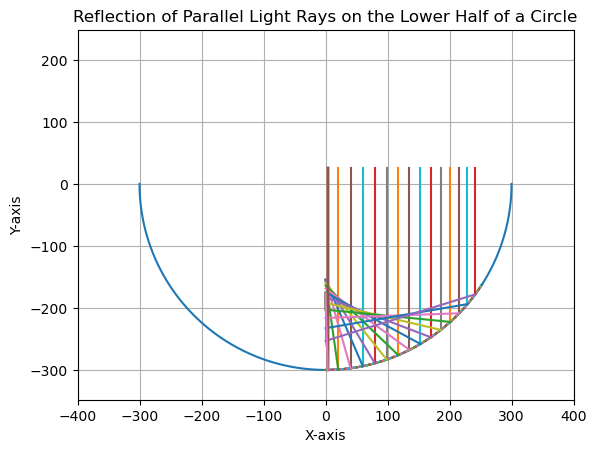

In [8]:
# 创建一个图形窗口和子图对象
fig, ax = plt.subplots()


# draw a circle 
draw_circle(fig, ax)


# draw a bunch of  line segments to fit the circle 
line_segments_array = []

find_line_segments_circle(line_segments_array)
    
print_line_segments(line_segments_array)
    
plot_line_segments(line_segments_array, fig, ax)

for i in range(1, 15):
    circle_reflect_simple(20 * i)

#for i in range(1,10):
    circle_reflect_simple(3)

# set equal
plt.axis('equal')

# set the range
plt.xlim(-400, 400)
plt.ylim(-350, 250)

plt.title('Reflection of Parallel Light Rays on the Lower Half of a Circle')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
#plt.legend()
plt.grid(True)
plt.show()


In [9]:
intercept_array = []

def find_intercepts(line_segments_array,intercept_array):
    k1 = 1000000000
    for i in range(0,300):
        slope = reflect_slope(k1,line_segments_array[i].get_slope())
        line = LineSegment(left_endpoint=line_segments_array[i].get_endpoints()[0], slope=slope)
        intercept_array.append(line.intercept())

find_intercepts(line_segments_array,intercept_array)


In [10]:
def find_minimal_interval(arr):
    arr.sort()  # 先对数组进行排序
    #min_count = float('inf')  # 初始化最小个数为正无穷大

    max_count = 0
    optimal_interval = []

    for i in range(round(arr[0]),round(arr[-1]-20)):
        current_interval = []
        for j in range(len(arr)):
            if (i + 20 > arr[j] and i < arr[j]):
                current_interval.append(arr[j])
                j = j + 1
        count = len(current_interval)

        if count > max_count:
            max_count = count
            optimal_interval = current_interval


    print("最da个数的区间：[", i, ",", i + 20, "] 个数：", max_count)
    return optimal_interval

# 示例用法
my_array = intercept_array
result = find_minimal_interval(my_array)
print("最da个数的区间：", result)


最da个数的区间：[ -174 , -154 ] 个数： 120
最da个数的区间： [-173.84397765137476, -173.51378876886508, -173.18683176959058, -172.86308187472173, -172.5425146801708, -172.22510615193195, -171.91083262154976, -171.5996707817143, -171.43899418352552, -171.29159768198213, -170.98659072462289, -170.68462766059025, -170.38568658561664, -170.08974593643256, -169.79678448710817, -169.50678134551922, -169.21971594993553, -168.93556806573395, -168.65431778223407, -168.3759455096594, -168.10043197622258, -167.8277582253374, -167.55790561295674, -167.29085580503946, -167.02659077514613, -166.76509280216592, -166.6838949174225, -166.50634446817685, -166.25032865644016, -165.99702854953279, -165.74642762761925, -165.4985096668657, -165.25325873800062, -165.0106592050243, -164.7706957240705, -164.53335324242627, -164.2986169977127, -164.06647251723163, -163.83690561748438, -163.66206533866952, -163.60990240386764, -163.38544927055267, -163.1635329005548, -162.9441402660006, -162.72725862859946, -162.51287554032996, -